<a href="https://colab.research.google.com/github/abhijitrri/Euler_project/blob/main/Copy_of_week1_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [ ]:
# Build the Sequential feedforward neural network model

model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(16,activation='relu',name='L1'),
    Dense(16, activation='relu',name='L2'),
    Dense(10, activation='softmax', name='L3')
])

In [ ]:
# Print the model summary
print(model.summary())


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 L1 (Dense)                  (None, 16)                12560     
                                                                 
 L2 (Dense)                  (None, 16)                272       
                                                                 
 L3 (Dense)                  (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
None


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [ ]:
# Build the Sequential convolutional neural network model
model = Sequential([
    Conv2D(16,(3,3),padding = 'SAME', strides = 2,activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3),strides=2),
    Flatten(),
    Dense(10, activation='softmax')
])
#The 1 is necessary as that one indicates the number of channels in our input, it is a requirement of the conv2D layer


In [ ]:
# Print the model summary

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 576)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                5770      
                                                                 
Total params: 5,930
Trainable params: 5,930
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1 = Sequential([
    Conv2D(16,(3,3),activation='relu', input_shape=(28,28,1),data_format = 'channels_last'),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [ ]:
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 flatten_8 (Flatten)         (None, 1024)              0         
                                                                 
 dense_13 (Dense)            (None, 10)                10250     
                                                                 
Total params: 10,410
Trainable params: 10,410
Non-trainable params: 0
_________________________________________________________________


#Weight Initializer
Default weights and biases
In the models we have worked with so far, we have not specified the initial values of the weights and biases in each layer of our neural networks.

The default values of the weights and biases in TensorFlow depend on the type of layers we are using.

For example, in a Dense layer, the biases are set to zero (zeros) by default, while the weights are set according to glorot_uniform, the Glorot uniform initialiser.

The Glorot uniform initialiser draws the weights uniformly at random from the closed interval  [−𝑐,𝑐]
 , where
𝑐=sqrt(6/(n_input n_output))

We often would like to initialise our own weights and biases, and TensorFlow makes this process quite straightforward.

When we construct a model in TensorFlow, each layer has optional arguments kernel_initialiser and bias_initialiser, which are used to set the weights and biases respectively.

If a layer has no weights or biases (e.g. it is a max pooling layer), then trying to set either kernel_initialiser or bias_initialiser will throw an error.

Let's see an example, which uses some of the different initialisations available in Keras.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPooling1D 

In [ ]:
# Construct a model

model = Sequential([
    Conv1D(filters=16, kernel_size=3, input_shape=(128, 64), kernel_initializer='random_uniform', bias_initializer="zeros", activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, kernel_initializer='he_uniform', bias_initializer='ones', activation='relu'),
])

In [ ]:
# Add some layers to our model

model.add(Dense(64, 
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'),)

model.add(Dense(8, 
                kernel_initializer=tf.keras.initializers.Orthogonal(gain=1.0, seed=None), 
                bias_initializer=tf.keras.initializers.Constant(value=0.4), 
                activation='relu'))

In [ ]:
import tensorflow.keras.backend as K
# Define a custom initializer

def my_init(shape, dtype=None):
    return K.random_normal(shape, dtype=dtype)

model.add(Dense(64, kernel_initializer=my_init))

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 126, 16)           3088      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 31, 16)           0         
 )                                                               
                                                                 
 flatten_9 (Flatten)         (None, 496)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                31808     
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 8)                 520       
                                                     

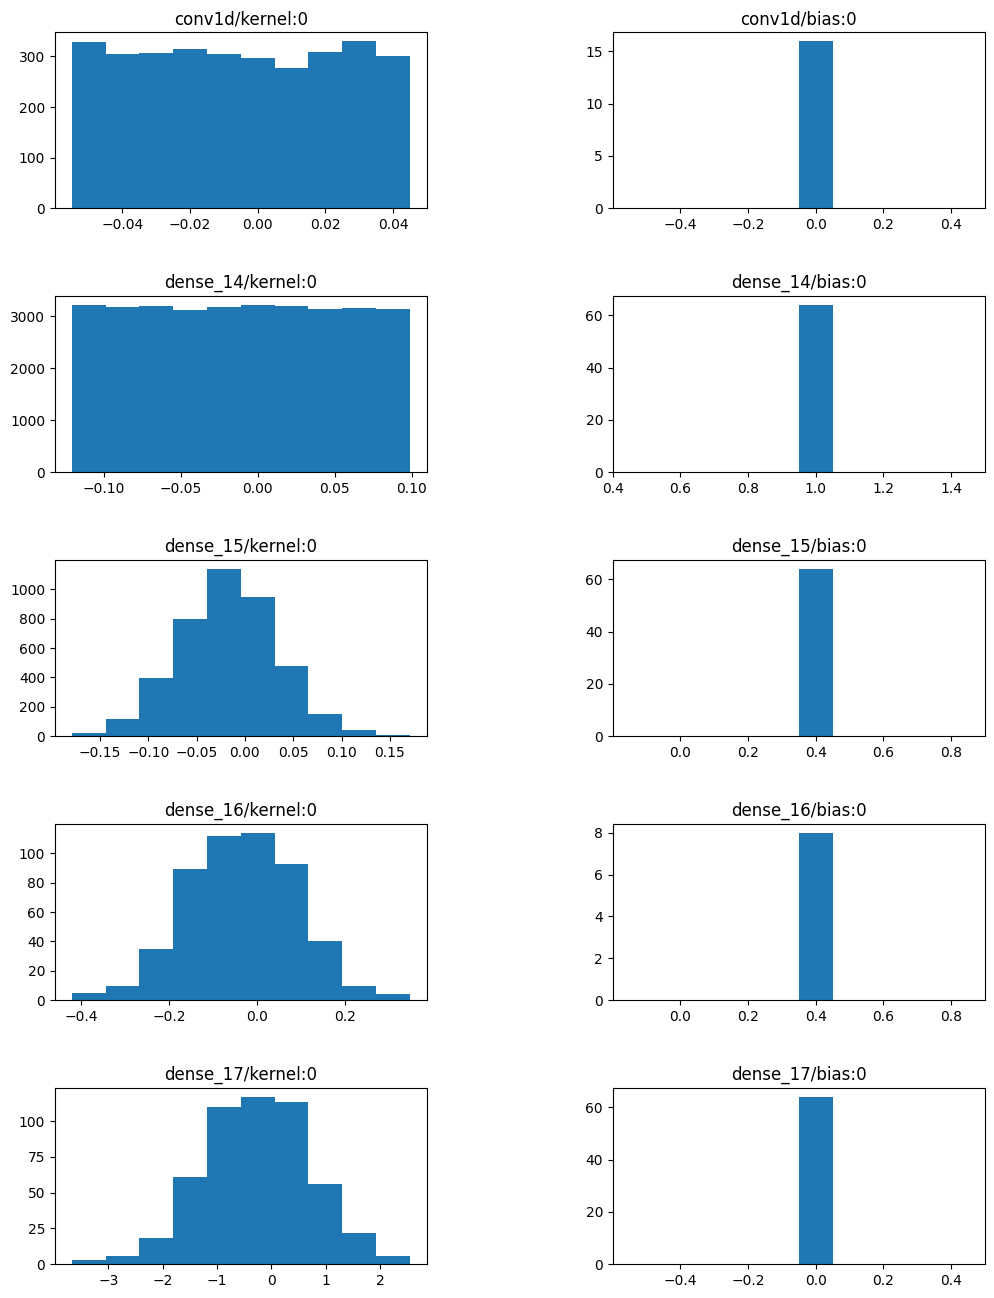

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms of weight and bias values

fig, axes = plt.subplots(5, 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Filter out the pooling and flatten layers, that don't have any weights
weight_layers = [layer for layer in model.layers if len(layer.weights) > 0]

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

***
<a id="coding_tutorial_3"></a>
## The compile method


In case we decide to use format = 'channels_first', we have to use (1,28,28) - both for the Conv2D layer and the pooling layer

#### Compile the model

In [ ]:
# Define the model optimizer, loss function and metrics



In [ ]:
# Print the resulting model attributes



***
<a id="coding_tutorial_4"></a>
## The fit method

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [ ]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [ ]:
# Print the shape of the training data



In [ ]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [ ]:
# Rescale the image values so that they lie in between 0 and 1.



In [ ]:
# Display one of the images



#### Fit the model

In [ ]:
# Fit the model



#### Plot training history

In [ ]:
# Load the history into a pandas Dataframe



In [ ]:
# Make a plot for the loss



In [ ]:
# Make a plot for the accuracy



In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [ ]:
# Evaluate the model



#### Make predictions from the model

In [ ]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [ ]:
# Get the model predictions

